# Student Performace Analysis

An analysis of student performace based on various factors in school and external factors such as race/ethnicity

1. Importing packages and dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

In [3]:
# Reading Data into notebook
df = pd.read_csv('C:/Users/Rupen/Documents/Data projects/Student performace in exams/StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


2. Pre-Processing Data.

In [4]:
#Checking for null values: 
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

No null or missing values. 

In [5]:
#Gender column: 
df['gender'].unique()
# 2 distinct genders in male and female in this column. 


array(['female', 'male'], dtype=object)

In [6]:
#Race/ethnicity: 
df['race/ethnicity'].unique()
# 5 types of group listed 

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [7]:
# Parental education: 
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

Looking at Parental education we can reduce the number of catergories by replacing similar catergories, such as 'some college'with assiciate's degree and 'some high school' with 'high school'. We as having too many catergories uncessarily would crowd the data. 

In [8]:
# Reaplcing the above: 
df['parental level of education']=df['parental level of education'].str.replace('some college',"associate's degree")
df['parental level of education']=df['parental level of education'].str.replace('some high school',"high school")
# After making changes re-ran above cell to find 4 catergories(reduced from 6)

In [9]:
#Lunch column: 
df['lunch'].unique()


array(['standard', 'free/reduced'], dtype=object)

The input of 'free/reduced' is hard to understand, will replace string with just the word reduced lunch time to allow easier read of data. 

In [10]:
df['lunch'] = df['lunch'].str.replace('free/reduced', 'reduced')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,associate's degree,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,reduced,none,47,57,44
4,male,group C,associate's degree,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,reduced,none,62,55,55
997,female,group C,high school,reduced,completed,59,71,65
998,female,group D,associate's degree,standard,completed,68,78,77


In [11]:
#Testing preparation: 
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

All the numberical columns/test scores have no null value.

In [12]:
# Creating total score column: 
df['Total score']=df['math score']+df['reading score']+df['writing score']
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,associate's degree,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,reduced,none,47,57,44,148
4,male,group C,associate's degree,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,reduced,none,62,55,55,172
997,female,group C,high school,reduced,completed,59,71,65,195
998,female,group D,associate's degree,standard,completed,68,78,77,223


In [13]:
print("Average math score is    : {}".format(np.mean(df['math score'])))
print("Average reading score is : {}".format(np.mean(df['reading score'])))
print("Average writing score is : {}".format(np.mean(df['writing score'])))
print("Average total score is   : {}".format(np.mean(df['Total score'])/3))

Average math score is    : 66.089
Average reading score is : 69.169
Average writing score is : 68.054
Average total score is   : 67.77066666666667


3. Data Visualisation

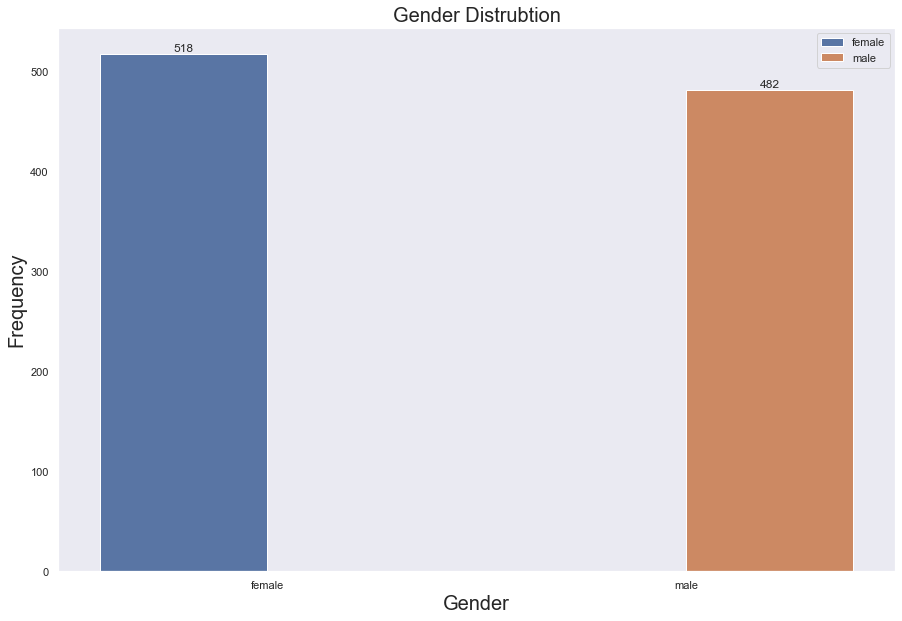

In [14]:
# Distrubtion of Gender: 
plt.figure(figsize=(15, 10))
sns.set(style = 'dark')
ax1 = sns.barplot( data = df, x = df['gender'].value_counts().index, y =df['gender'].value_counts().values, hue = ['female', 'male'])
plt.legend()
plt.xlabel('Gender', fontsize = 20)
plt.ylabel('Frequency',fontsize = 20)
plt.title('Gender Distrubtion', fontsize = 20)
# Labelling data points: 
for container in ax1.containers:
    ax1.bar_label(container)





In this dataset there is slightly more females then males.

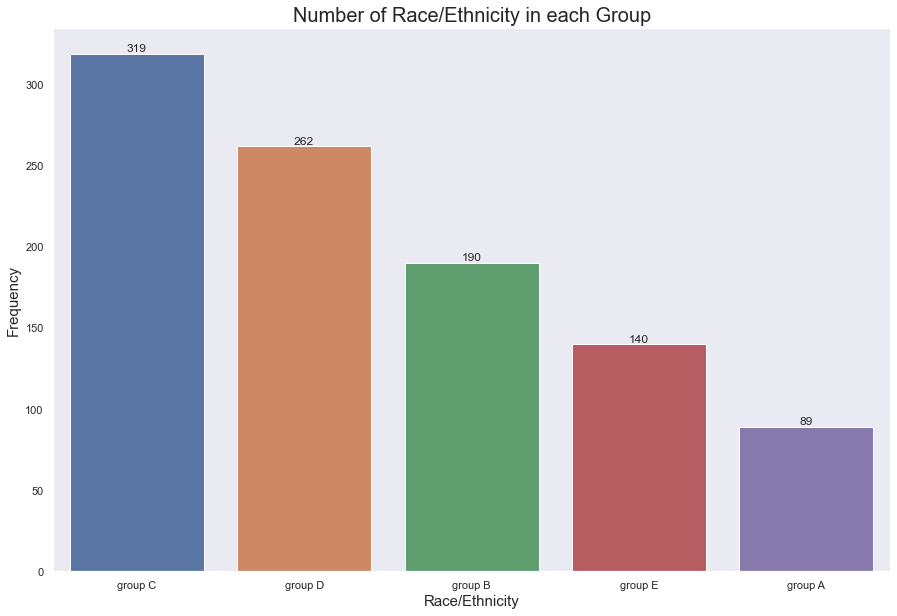

In [15]:
# Distrubtion of race/ethnicity.
plt.figure(figsize=(15,10))
ax2 = sns.countplot(data = df, x = 'race/ethnicity',order = df['race/ethnicity'].value_counts().index)
plt.xlabel('Race/Ethnicity', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Number of Race/Ethnicity in each Group', fontsize = 20)
# Labelling data points: 
for container in ax2.containers:
    ax2.bar_label(container)

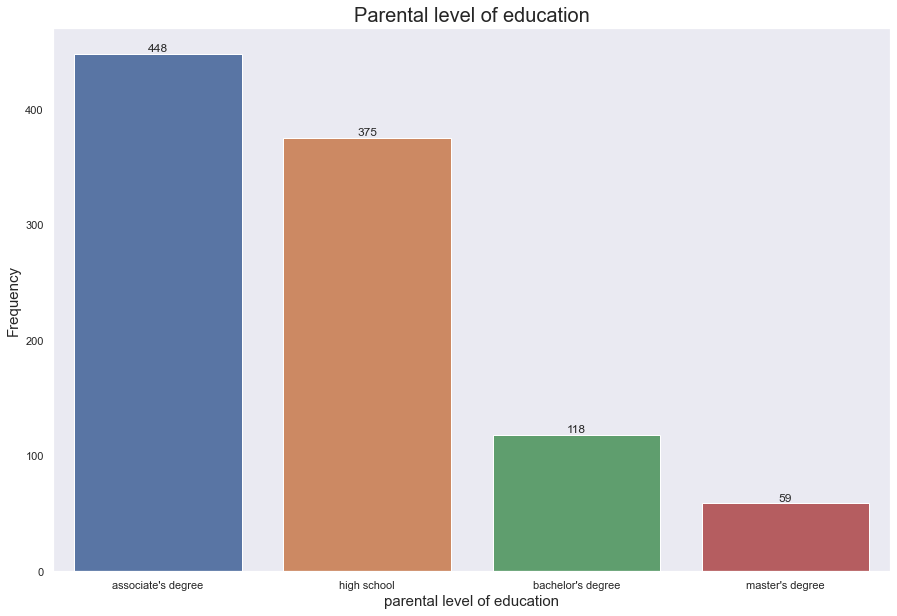

In [16]:
#Distrubtion of level of education for parents: 
plt.figure(figsize=(15,10))
ax3 = sns.countplot(data = df, x = 'parental level of education',order = df['parental level of education'].value_counts().index)
plt.xlabel('parental level of education', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Parental level of education', fontsize = 20)
# Labelling data points: 
for container in ax3.containers:
    ax3.bar_label(container)

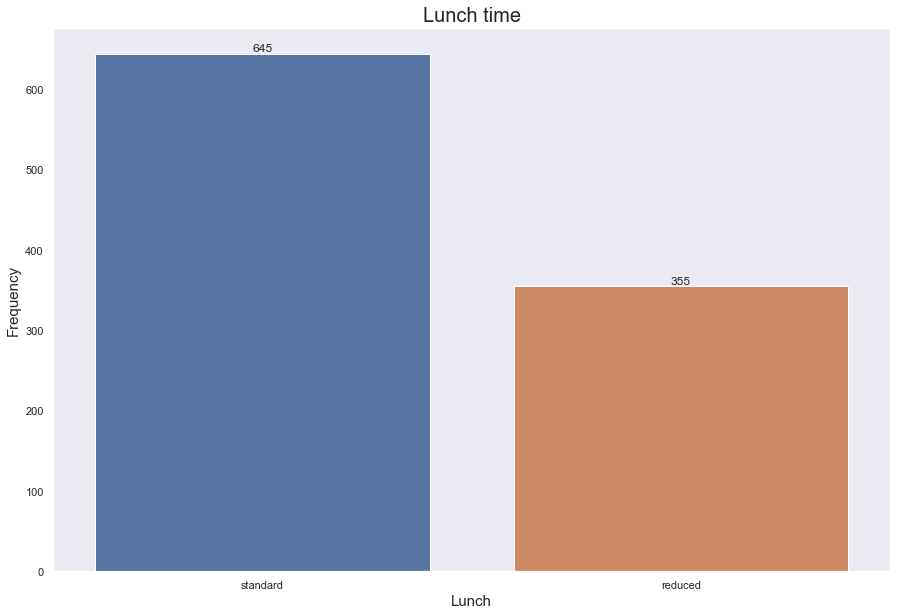

In [17]:
#Distrbution of lunch time: 
plt.figure(figsize=(15,10))
ax4 = sns.countplot(data = df, x = 'lunch',order = df['lunch'].value_counts().index)
plt.xlabel('Lunch', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Lunch time', fontsize = 20)
# Labelling data points: 
for container in ax4.containers:
    ax4.bar_label(container)


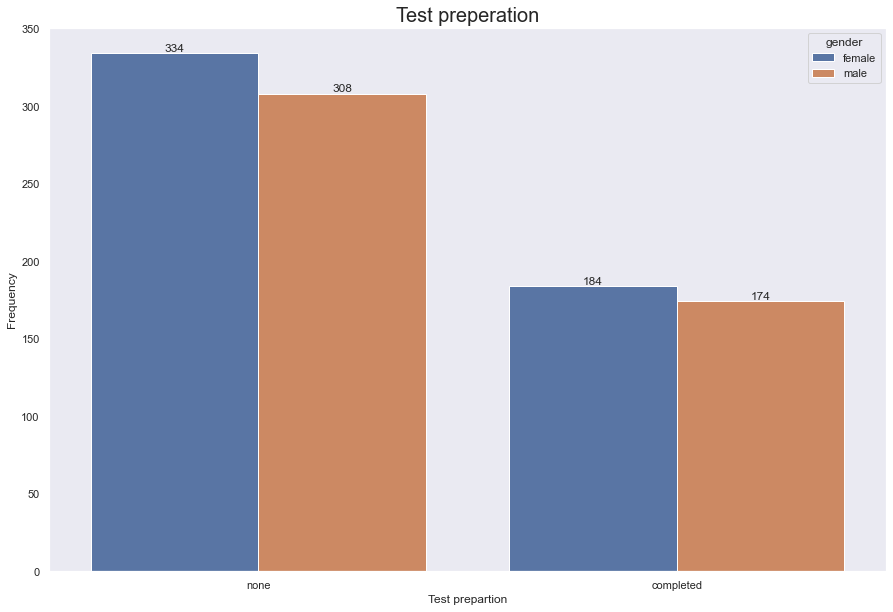

In [18]:
#Distrubtion of study prep:
plt.figure(figsize = (15,10))
ax5 = sns.countplot(data = df, x = df['test preparation course'],hue = 'gender')
plt.title('Test preperation', fontsize = 20)
plt.xlabel('Test prepartion')
plt.ylabel('Frequency')
# Labelling data points: 
for container in ax5.containers:
    ax5.bar_label(container)

Mean math score is    : 66.089
Minimum Math Score is : 0
Maximum Math Score is : 100
Standard Deviation Math Score is : 15.155496659628165


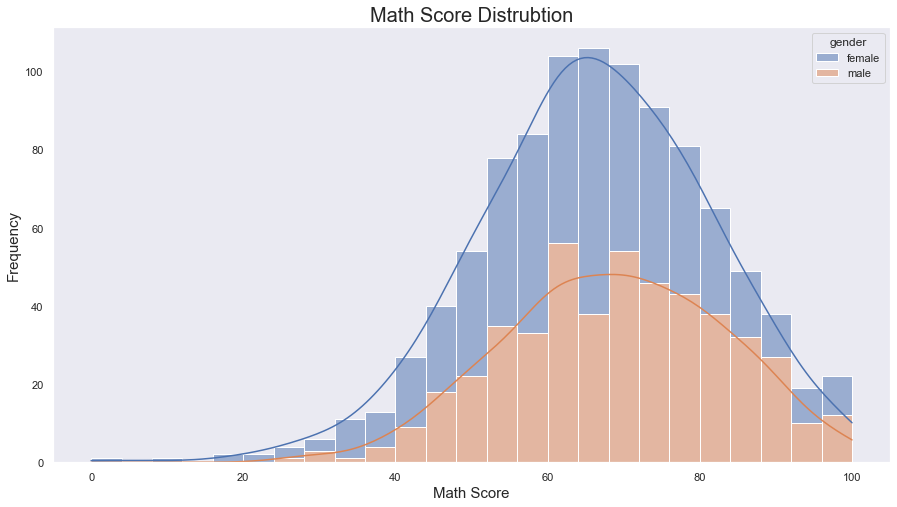

In [19]:
#Distrubtion of test scores
#1. Math scores: 
plt.figure(figsize=(15,8))
ax6 = sns.histplot(data = df, x = 'math score', kde = True,hue = 'gender', multiple="stack")
plt.title('Math Score Distrubtion', fontsize = 20)
plt.xlabel('Math Score', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
print("Mean math score is    : {}".format(np.mean(df['math score'])))
print('Minimum Math Score is : {}'.format(np.min(df['math score'])))
print('Maximum Math Score is : {}'.format(np.max(df['math score'])))
print('Standard Deviation Math Score is : {}'.format(np.std(df['math score'])))




The math scores centre around the 60 - 80 mark range, with the most dense part being between 60 - 70. 

Mean math score is    : 69.169
Minimum Read Score is : 17
Maximum Read Score is : 100
Standard Deviation Read Score is : 14.59289001534652


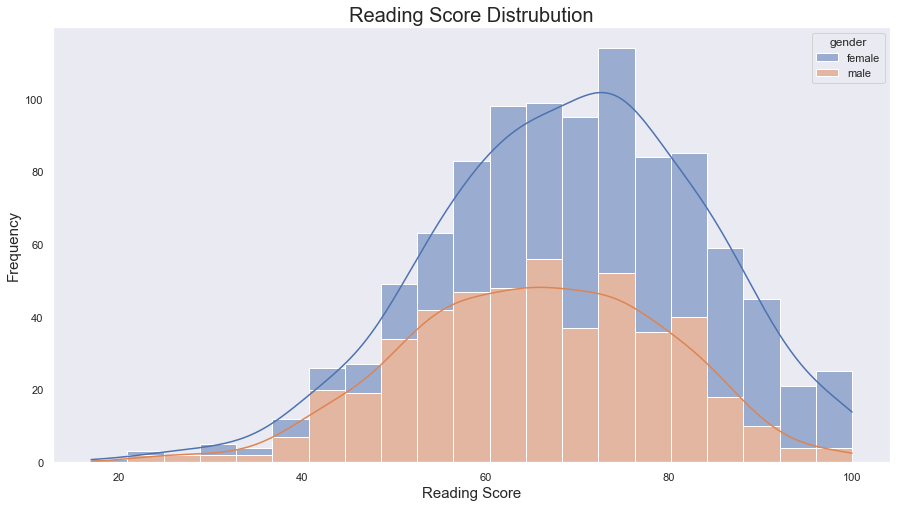

In [20]:
plt.figure(figsize=(15,8))
ax7 = sns.histplot(data = df, x = 'reading score', kde = True, hue = 'gender', multiple="stack")
plt.title('Reading Score Distrubution', fontsize = 20)
plt.xlabel('Reading Score', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
print("Mean math score is    : {}".format(np.mean(df['reading score'])))
print('Minimum Read Score is : {}'.format(np.min(df['reading score'])))
print('Maximum Read Score is : {}'.format(np.max(df['reading score'])))
print('Standard Deviation Read Score is : {}'.format(np.std(df['reading score'])))


Reading has similar properties to the math scores with the mean centered around the 60- 80 range. 

Mean Writiing score is    : 68.054
Minimum Writing Score is : 10
Maximum Writing Score is : 100
Standard Deviation Writing Score is : 15.188057281956757


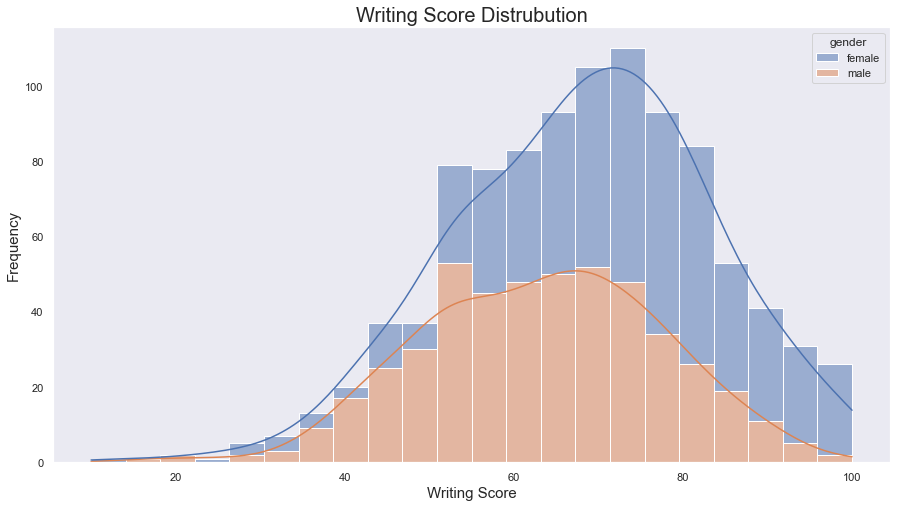

In [21]:
plt.figure(figsize=(15,8))
ax8 = sns.histplot(data = df, x = 'writing score', kde = True, hue = 'gender', multiple="stack")
plt.title('Writing Score Distrubution', fontsize = 20)
plt.xlabel('Writing Score', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
print("Mean Writiing score is    : {}".format(np.mean(df['writing score'])))
print('Minimum Writing Score is : {}'.format(np.min(df['writing score'])))
print('Maximum Writing Score is : {}'.format(np.max(df['writing score'])))
print('Standard Deviation Writing Score is : {}'.format(np.std(df['writing score'])))

In [22]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Total score'],
      dtype='object')

Text(0.5, 0, 'Math score')

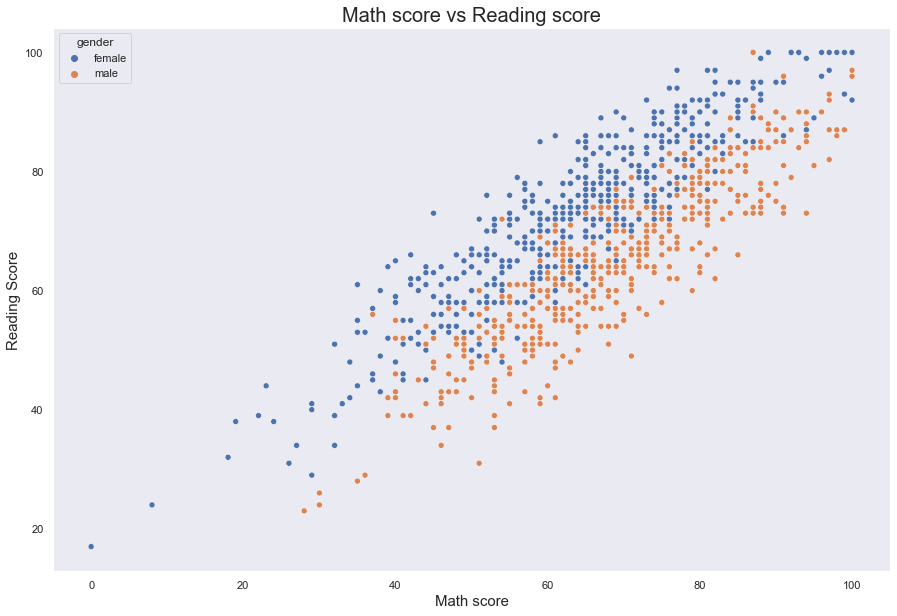

In [23]:
# Exploring relationship between various scores. 
plt.figure(figsize = (15,10))
sns.scatterplot(data = df, x = 'math score', y = 'reading score', hue = 'gender')
plt.title('Math score vs Reading score', fontsize = 20)
plt.ylabel('Reading Score', fontsize = 15)
plt.xlabel('Math score', fontsize = 15)

We can see a postiive relationship between Math scores and reading scores meaning the higher the math score the higher the reading score(and vice vesa). From this graph we can see that male students have performed better. 

Text(0.5, 0, 'Writing score')

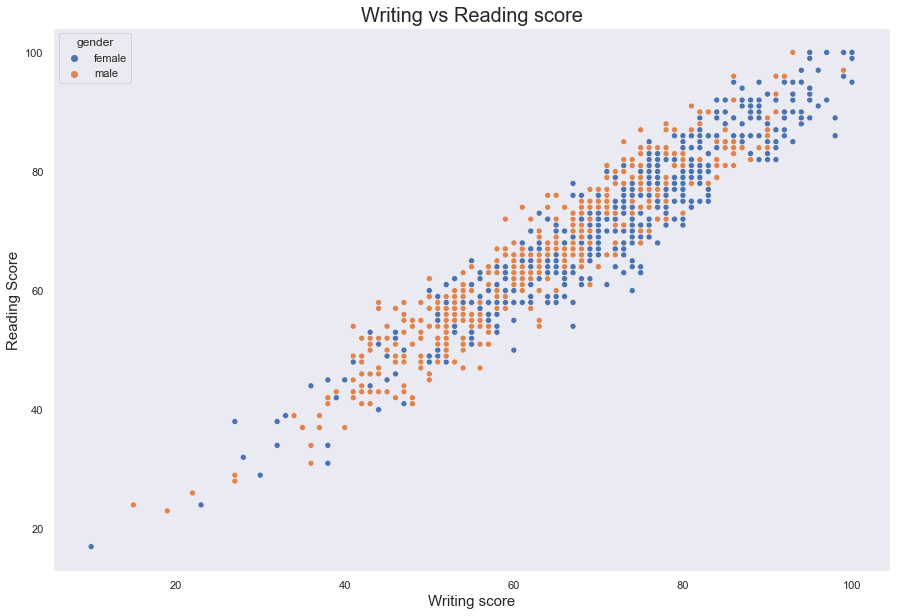

In [24]:
plt.figure(figsize = (15,10))
sns.scatterplot(data = df, x = 'writing score', y = 'reading score', hue = 'gender')
plt.title('Writing vs Reading score', fontsize = 20)
plt.ylabel('Reading Score', fontsize = 15)
plt.xlabel('Writing score', fontsize = 15)

There is a postivie relationship between reading and writing score. Menaing those that score high in either reading or writing tend to better at the other. 

Text(0.5, 0, 'Math score')

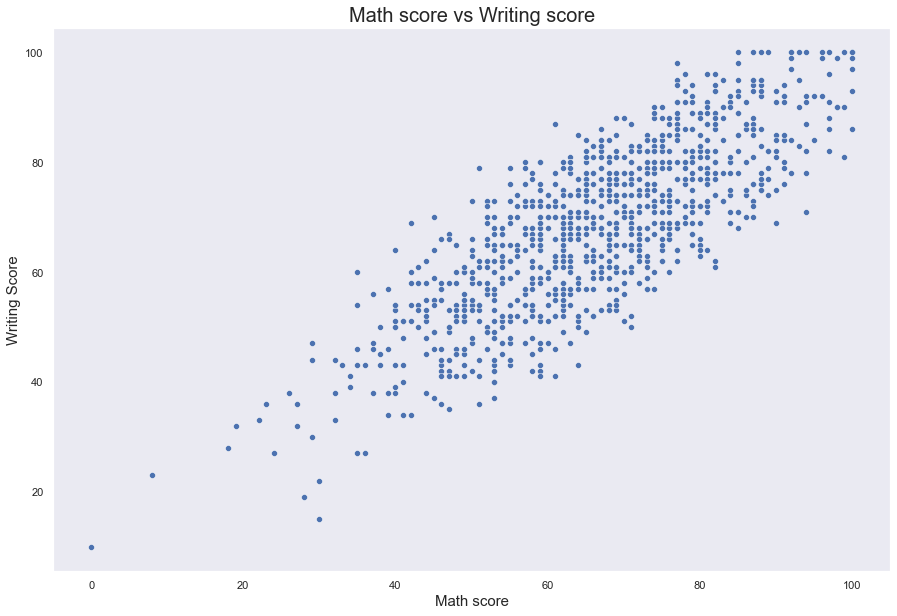

In [25]:
plt.figure(figsize = (15,10))
sns.scatterplot(data = df, x = 'math score', y = 'writing score')
plt.title('Math score vs Writing score', fontsize = 20)
plt.ylabel('Writing Score', fontsize = 15)
plt.xlabel('Math score', fontsize = 15)

Positive relationship between math scores and writing score menaing those that score high in maths tend to also score high in writing. 


# Analysing race affect of test scores.

In [34]:
# Analysing race affect of test scores.
race=df.groupby("race/ethnicity")["math score", "reading score", "writing score"].mean().reset_index()
race1= pd.melt(race , id_vars="race/ethnicity", var_name="Test Type", value_name="Scores")
race1

<ipython-input-34-02375e10c198>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  race=df.groupby("race/ethnicity")["math score", "reading score", "writing score"].mean().reset_index()


,race/ethnicity,Test Type,Scores
0,group A,math score,61.629213
1,group B,math score,63.452632
2,group C,math score,64.463950
3,group D,math score,67.362595
4,group E,math score,73.821429
5,group A,reading score,64.674157
6,group B,reading score,67.352632
7,group C,reading score,69.103448
8,group D,reading score,70.030534
9,group E,reading score,73.028571


Text(0, 0.5, 'Average scores')

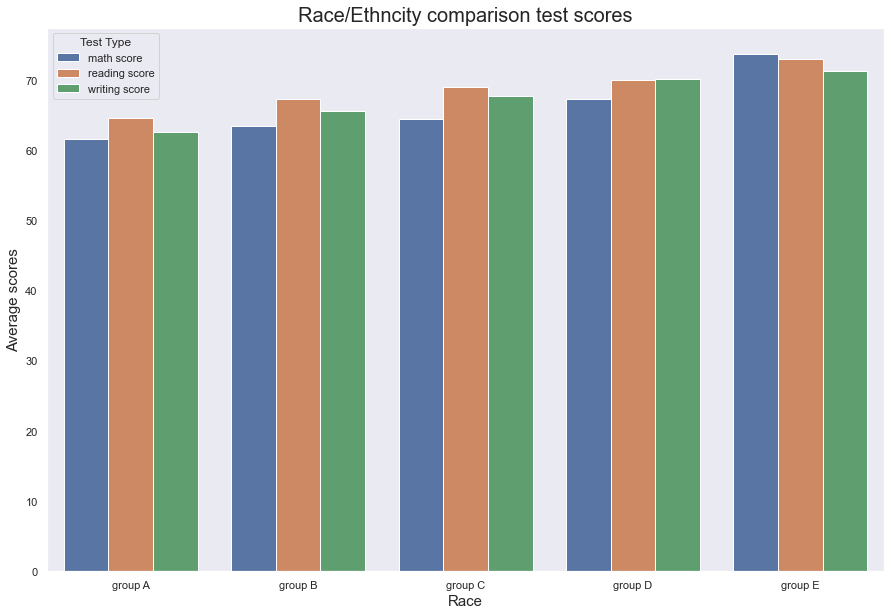

In [40]:
# plotting bar graph.

plt.figure(figsize = (15,10))
ax9 = sns.barplot(x='race/ethnicity', y='Scores', hue='Test Type', data=race1)
plt.title('Race/Ethncity comparison test scores', fontsize = 20)
plt.xlabel('Race', fontsize = 15)
plt.ylabel('Average scores', fontsize = 15)

The above graph depicts 5 groups of races and their average test score in each of the 3 subjects. Group E has on average out performed the rest of the groups with the lowest being group A in all aspects. More focus on this group could lead to better test scores.

# Analysing Parents education on student test scores

In [45]:
# Finding average mean scores of each test score based on parents education. 
edu = df.groupby("parental level of education")["math score", "reading score", "writing score"].mean().reset_index()
edu = pd.melt(edu , id_vars="parental level of education", var_name="Test Type", value_name="Scores")
edu

<ipython-input-45-6e1b84d7d92b>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  edu = df.groupby("parental level of education")["math score", "reading score", "writing score"].mean().reset_index()


,parental level of education,Test Type,Scores
0,associate's degree,math score,67.502232
1,bachelor's degree,math score,69.389831
2,high school,math score,62.786667
3,master's degree,math score,69.745763
4,associate's degree,reading score,70.187500
5,bachelor's degree,reading score,73.000000
6,high school,reading score,65.770667
7,master's degree,reading score,75.372881
8,associate's degree,writing score,69.363839
9,bachelor's degree,writing score,73.381356


Text(0, 0.5, 'Average scores')

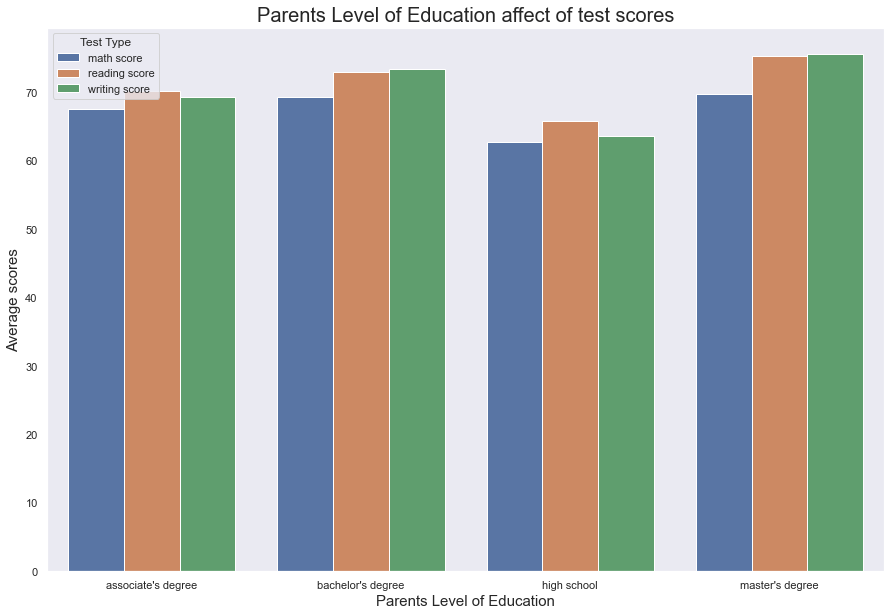

In [47]:
# Grpahing bar plt for comparison of each parent education level
plt.figure(figsize = (15,10))
ax10 = sns.barplot(x='parental level of education', y='Scores', hue='Test Type', data=edu)
plt.title('Parents Level of Education affect of test scores', fontsize = 20)
plt.xlabel('Parents Level of Education', fontsize = 15)
plt.ylabel('Average scores', fontsize = 15)


The above graph depicts that those students whose parents have higher level of education tend to score higher on average in each test subject. Its worth while noting that the difference between the 4 groups is larger between high school and the rest. However between bacherlor,associate and masters degree average gap is much smaller. By identifying parents level of education it can help determine whether that student will do well or may need help to improve their scores. 

# Analysis of Gender on test scores

In [49]:
#Creating table for average scores based on geneder. 
gender = df.groupby("gender")["math score", "reading score", "writing score"].mean().reset_index()
gender = pd.melt(gender , id_vars="gender", var_name="Test Type", value_name="Scores")
gender

<ipython-input-49-b519ab40d51a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gender = df.groupby("gender")["math score", "reading score", "writing score"].mean().reset_index()


,gender,Test Type,Scores
0,female,math score,63.633205
1,male,math score,68.728216
2,female,reading score,72.608108
3,male,reading score,65.473029
4,female,writing score,72.467181
5,male,writing score,63.311203


Text(0, 0.5, 'Average score')

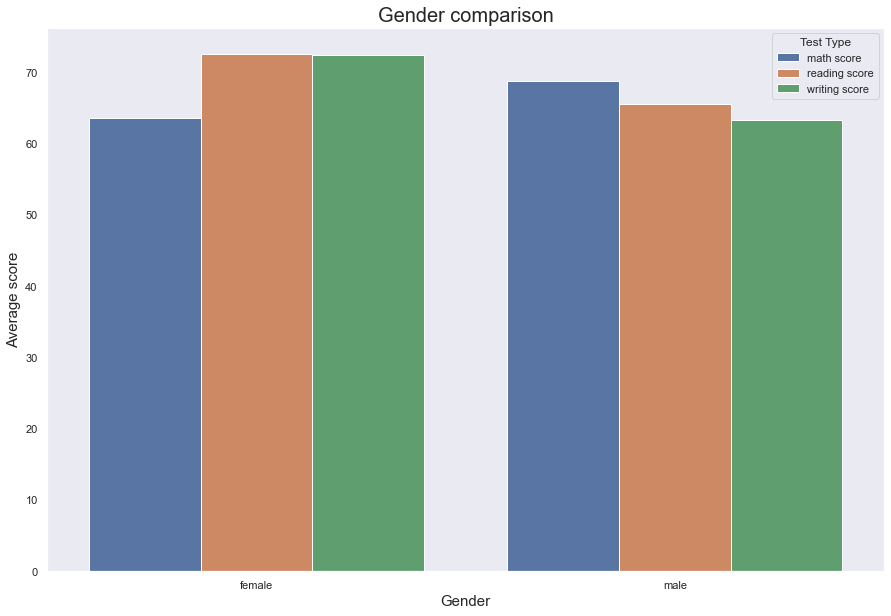

In [51]:
# Grpahing bar plt for comparison of each gender
plt.figure(figsize = (15,10))
ax11 = sns.barplot(x='gender', y='Scores', hue='Test Type', data=gender)
plt.title('Gender comparison', fontsize = 20)
plt.xlabel('Gender', fontsize = 15)
plt.ylabel('Average score', fontsize = 15)

On average female tend to outperofrm the males in reading and writing . Specific focus on how we can improve male test scores is needed as the average is quite siginficant. However the math score indicate males outperform females, which could indicate that a specific focus on females in maths is needed. 

# Analysis of test prep

In [54]:
#Creating table for average scores based on geneder. 
prep = df.groupby("test preparation course")["math score", "reading score", "writing score"].mean().reset_index()
prep = pd.melt(prep , id_vars="test preparation course", var_name="Test Type", value_name="Scores")
prep

<ipython-input-54-916c152d6ad1>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  prep = df.groupby("test preparation course")["math score", "reading score", "writing score"].mean().reset_index()


,test preparation course,Test Type,Scores
0,completed,math score,69.695531
1,none,math score,64.077882
2,completed,reading score,73.893855
3,none,reading score,66.534268
4,completed,writing score,74.418994
5,none,writing score,64.504673


Text(0, 0.5, 'Average score')

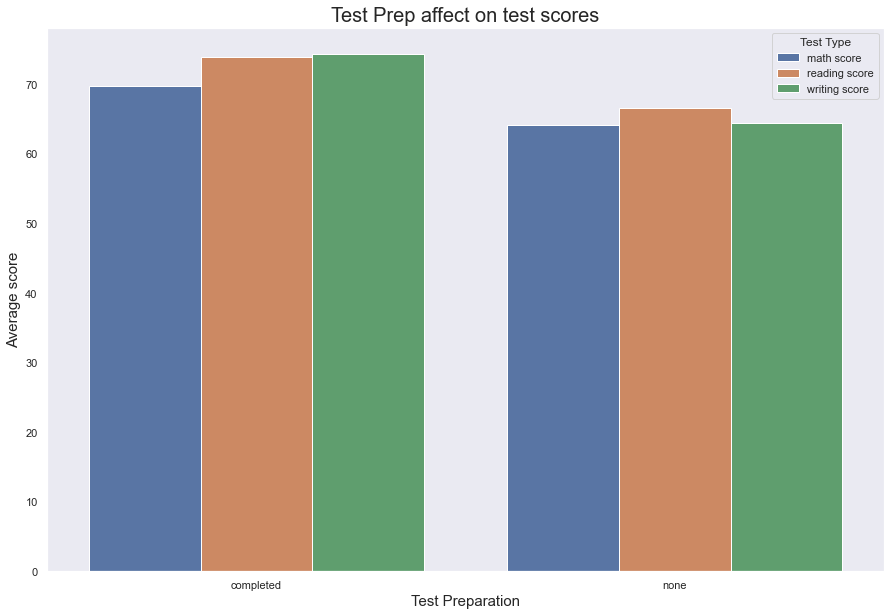

In [58]:
# Grpahing bar plt for comparison of each gender
plt.figure(figsize = (15,10))
ax11 = sns.barplot(x='test preparation course', y='Scores', hue='Test Type', data=prep)
plt.title('Test Prep affect on test scores', fontsize = 20)
plt.xlabel('Test Preparation', fontsize = 15)
plt.ylabel('Average score', fontsize = 15)

Graphs indicates what we all know, i.e on average those that completed the test prep scored better in all 3 departements

# Analysis of Lunch allocation on test scores

In [60]:
# Creating table for lunch time avereage/mean scores 
lunch = df.groupby("lunch")["math score", "reading score", "writing score"].mean().reset_index()
lunch= pd.melt(lunch , id_vars="lunch", var_name="Test Type", value_name="Scores")
lunch

<ipython-input-60-2a0dfceda30c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  lunch = df.groupby("lunch")["math score", "reading score", "writing score"].mean().reset_index()


,lunch,Test Type,Scores
0,reduced,math score,58.921127
1,standard,math score,70.034109
2,reduced,reading score,64.653521
3,standard,reading score,71.654264
4,reduced,writing score,63.022535
5,standard,writing score,70.823256


Text(0, 0.5, 'Average score')

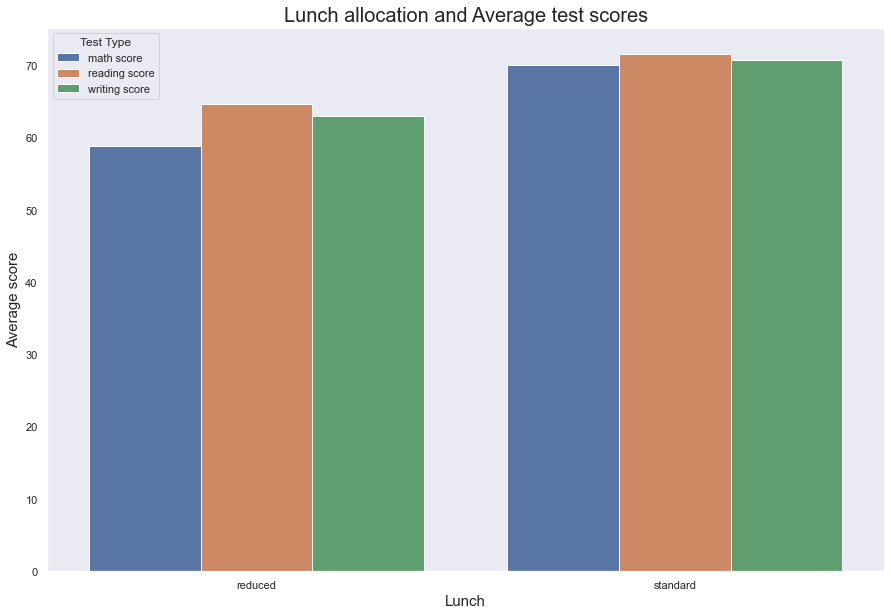

In [61]:
# Grpahing barplots to indicate comparison in lunch time allocation vs no lunch/reduced lunch
plt.figure(figsize = (15,10))
ax12 = sns.barplot(x='lunch', y='Scores', hue='Test Type', data=lunch)
plt.title('Lunch allocation and Average test scores', fontsize = 20)
plt.xlabel('Lunch', fontsize = 15)
plt.ylabel('Average score', fontsize = 15)

Those that have their standard lunch tend to score higher on average then those with reduced lunch. The average tends to be signifcantly higher. Hence it would be apporaite to allocate/encourage standard lunch for all students to ensure that they are getting the best possible score. 

# Key Take Aways: 

1. Those they tended to do better in 1 test also tended to do better in the other, positive relationship. 
2. Those whose parents have higher levels of education tended to do better then those whose parents had a 'lesser' qualification in education. 
3. Females tend to perform better in reading and writing, whilist males perform better in math.
4. Lunch time allocation is important as those with reduced tended to underperform. 
5. Test Prep should be encourage to imrpove test scores. 